In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import yfinance as yfin
import math
import matplotlib_inline.backend_inline 
import statsmodels.api as sm
from pandas_datareader import data as pdr
import plotly.graph_objects as go

matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'png')

plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"

Problem 1: Lagrange Multipliers

![1](1.jpeg)

In [ ]:
# 1.5 Eigenvector Simulation

In [15]:
# 2.1 Returns

stock_ids = ('GOOG', 'AAPL', 'TSLA')
yfin.pdr_override()
stock_data = pdr.get_data_yahoo(stock_ids, datetime(2013, 2, 1),
                                datetime(2023, 2, 1))["Adj Close"]
net_returns = 100 * (stock_data - stock_data.shift(1)) / stock_data.shift(1)
net_returns = net_returns.dropna()

net_returns.head()

mu = net_returns.mean(axis=0) * 252.0 
mu

[*********************100%***********************]  3 of 3 completed


AAPL    27.561301
GOOG    20.136823
TSLA    58.824375
dtype: float64

In [14]:
# 2.1 Covariance Matrix 

cov = net_returns.cov() * 252.0 
cov

AAPL        GOOG         TSLA
AAPL  827.316090  456.246504   629.886152
GOOG  456.246504  739.551200   567.702140
TSLA  629.886152  567.702140  3333.130784

In [21]:
# 2.1 Efficient Frontier 

n_pf = 10000 #number of portfolios in our simulation
sample_pf = 0.5 * np.random.normal(size=(len(stock_ids), n_pf))
mu_pf = np.array(mu) @ sample_pf
var_pf = (sample_pf.T @ np.array(cov) * sample_pf.T).sum(-1)
ef_flag = np.zeros_like(mu_pf)
for i in range(n_pf):
  if all(mu_pf[var_pf < var_pf[i]] < mu_pf[i]):
    ef_flag[i] = 1

fig = go.Figure()
fig.add_trace(
    go.Scatter(mode='markers',
               x=np.sqrt(var_pf),
               y=mu_pf,
               marker=dict(color='black', size=1),
               showlegend=False))
fig.add_trace(
    go.Scatter(mode='markers',
               x=np.sqrt(var_pf[np.nonzero(ef_flag)]),
               y=mu_pf[np.nonzero(ef_flag)],
               marker=dict(color='blue', size=2),
               name='Optimal'))
fig.add_trace(
    go.Scatter(mode='markers',
               x=np.sqrt(np.diag(np.array(cov))),
               y=np.array(mu),
               marker=dict(color='crimson', size=8),
               name='Individual'))
fig.update_layout(xaxis_title="Volatility",
                  yaxis_title="Mean",
                  height=600,
                  width=700)
fig.update_xaxes(range=[-3, 50])
fig.update_yaxes(range=[-50, 50])
fig.show()


Problem 2

![2](2.jpeg)

In [43]:
# 3.1 High Dimensional Covariance Matrix Estimation: p = 3
mean = np.zeros(3)
cov = np.identity(3)

simulations = np.random.multivariate_normal(mean, cov, size=1000)
cov_matrix = np.cov(simulations.T)

np.linalg.eigvals(cov_matrix)

array([1.04524036, 0.9751096 , 0.92040428])

From these results, we can see that the eigenvalues are close to 1 which indicates that the covariance matrix estimation is close to the actual covariance matrix. 

In [44]:
# 3.2 High Dimensional Covariance Matrix Estimation: p = 1000
mean_1000 = np.zeros(1000)
cov_1000 = np.identity(1000)

simulations_1000 = np.random.multivariate_normal(mean_1000, cov_1000, size=1000)
cov_matrix_1000 = np.cov(simulations_1000.T)

np.linalg.eigvals(cov_matrix_1000)

array([3.94494091e+00, 3.93090471e+00, 3.87563123e+00, 3.85302316e+00,
       3.82204586e+00, 3.79984969e+00, 3.77975195e+00, 3.75072185e+00,
       3.71921038e+00, 3.71188306e+00, 3.68740956e+00, 3.63171109e+00,
       3.61727426e+00, 3.60335051e+00, 3.59528283e+00, 3.58005248e+00,
       3.55901931e+00, 3.54524410e+00, 3.52752132e+00, 3.49815353e+00,
       3.50139319e+00, 3.47487181e+00, 3.46225987e+00, 3.41682085e+00,
       3.42839819e+00, 3.44155015e+00, 3.40503990e+00, 3.36765166e+00,
       3.35273108e+00, 3.33099643e+00, 3.31552641e+00, 3.30509282e+00,
       3.29158782e+00, 3.26976459e+00, 3.27999503e+00, 3.24884225e+00,
       3.24218739e+00, 3.23074518e+00, 3.21642689e+00, 3.20212342e+00,
       3.18834055e+00, 3.17867435e+00, 3.17142281e+00, 3.16033408e+00,
       3.14971184e+00, 3.09987459e+00, 3.11591896e+00, 3.13385611e+00,
       3.13076058e+00, 3.08008944e+00, 3.07261256e+00, 3.05713331e+00,
       3.05916664e+00, 3.04377969e+00, 3.02740730e+00, 3.02400257e+00,
      

In contrast to 3.1, the covariance matrix estimation deviates quite a lot from the original covariance matrix as we can see from most of the eigenvalues hovering between 3 and 4 instead of 1. This shows how it can be hard to estimate covariance matrix from data when the number of assets is of the same order of magnitude or larger than the number of time points we have data for.

Problem 4: Brownian Motion Computations
![4](4.jpeg)
![4.5](4.5.jpeg)

Problem 5: Brownian Motion and Martingales
![5](5.jpeg)

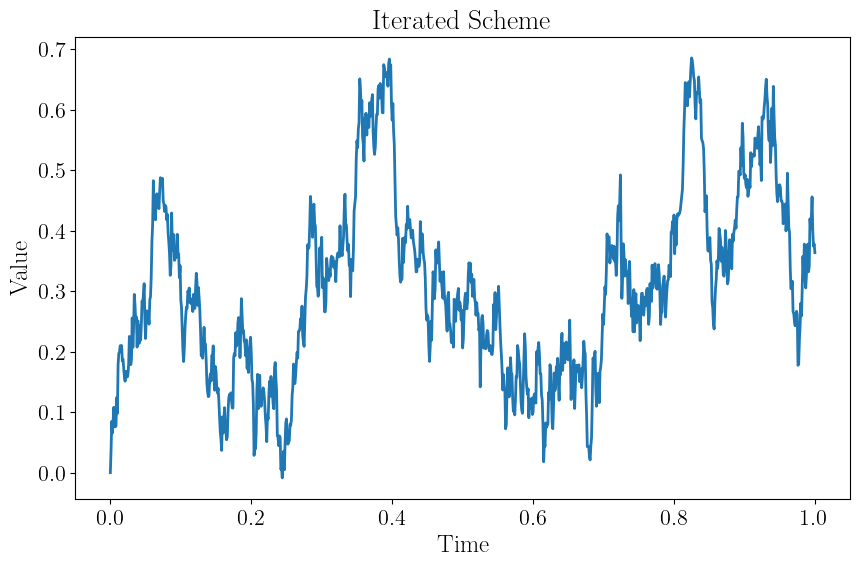

In [62]:
# 6.1 Brownian Motion Simulation: Iterated Scheme

def iterated_scheme():
    n = 1000
    timepoints = np.linspace(0, 1, n + 1)
    time = timepoints[1] - timepoints[0]
    increments = np.random.normal(0, np.sqrt(time), n)

    W = np.cumsum(increments)
    W = np.concatenate(([0], W))
    plt.plot(timepoints, W)
    plt.title('Iterated Scheme')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()

iterated_scheme()

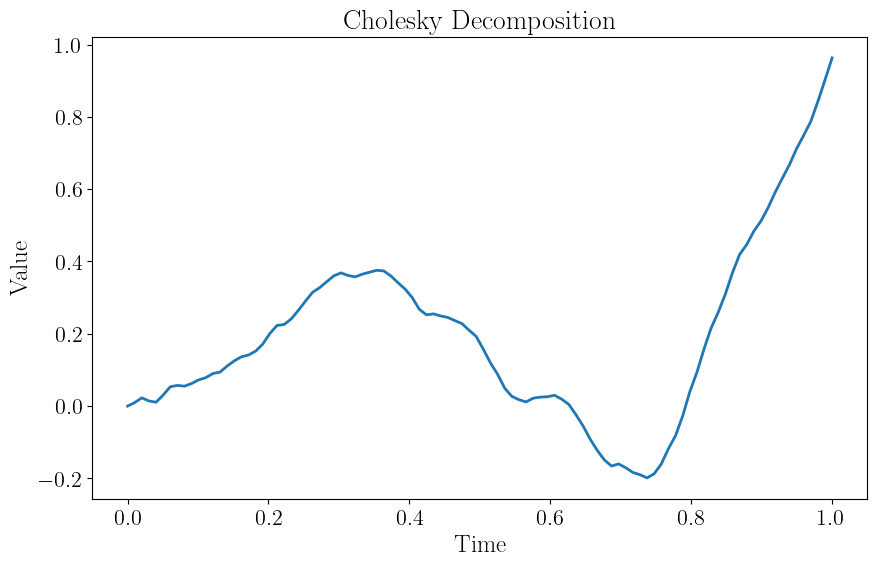

In [100]:
# 6.2 Cholesky Decomposition

def cholesky():
    n = 100
    timepoints = np.linspace(0.0000000001, 1, n)
    time = timepoints[1] - timepoints[0]

    covariance = np.minimum.outer(timepoints, timepoints)

    decomp = np.linalg.cholesky(covariance)

    # Generate a sample path of Brownian motion
    increments = np.random.normal(0, np.sqrt(time), n)
    value = np.dot(decomp, increments)
    value = np.cumsum(value)

    plt.plot(timepoints, value)
    plt.title('Cholesky Decomposition')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()

cholesky()

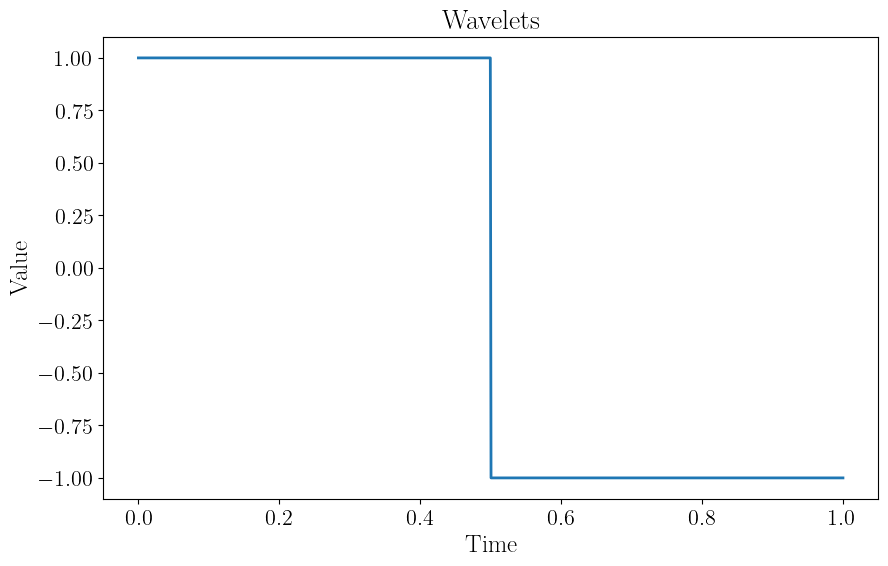

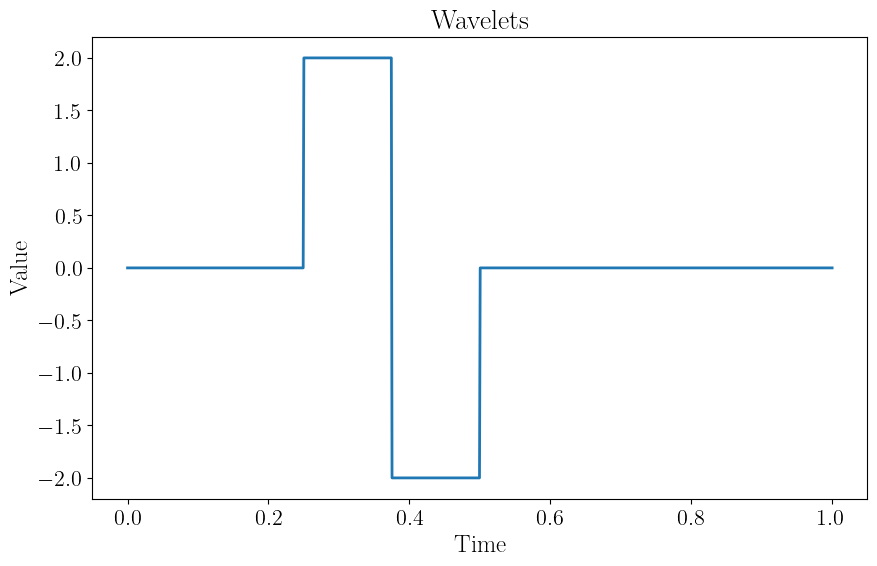

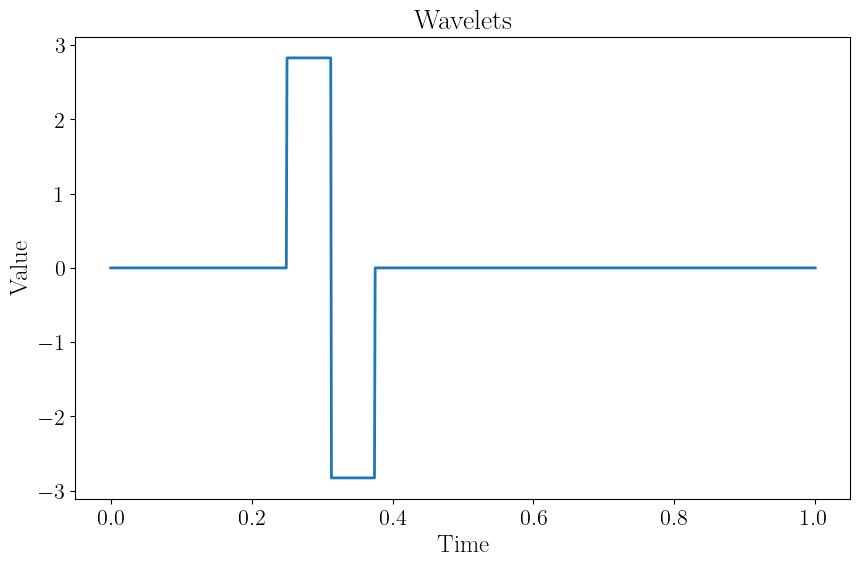

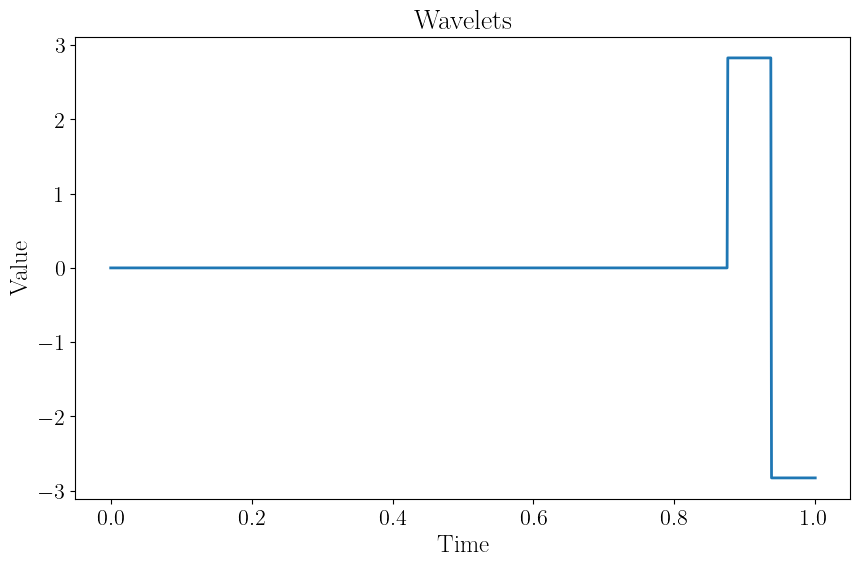

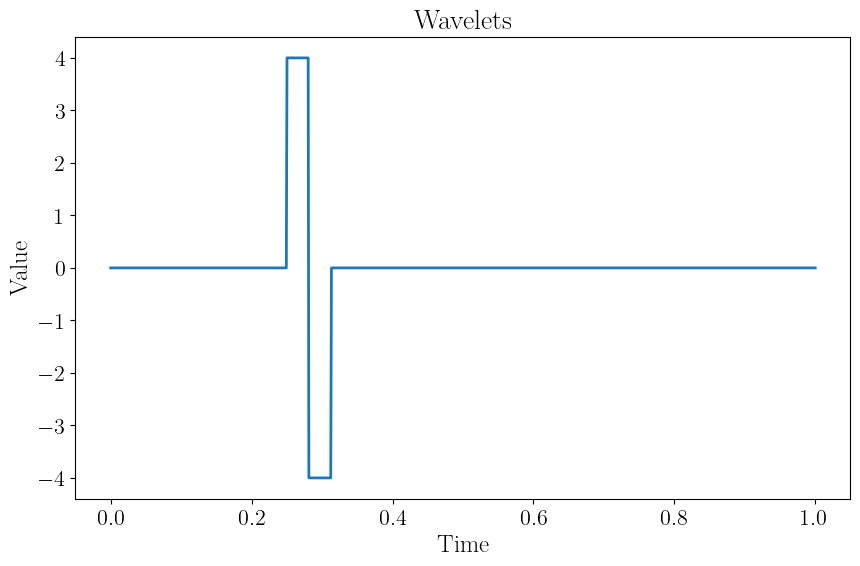

In [122]:
# 6.3 (a)

def mother(t):
    if 0 <= t < 0.5:
        return 1
    if 0.5 < t <= 1:
        return -1 
    return 0

def daughter(n, t):
    j = math.floor(math.log(n, 2))
    k = n - 2**j
    new_t = (2**j)*t - k
    x = 2**(j/2)
    return (x * mother(new_t))

def wavelets(n):
    x = 1000
    time = np.linspace (0, 1, x)
    daughters = [daughter(n, time[t]) for t in range(x)]
    plt.plot(time, daughters)
    plt.title('Wavelets')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()

samples = [1, 5, 10, 15, 20]
for sample in samples:
    wavelets(sample)


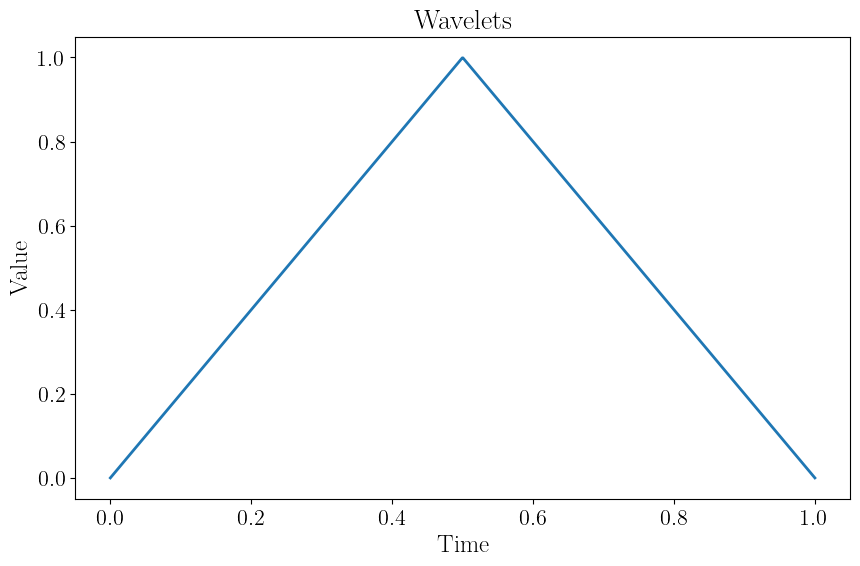

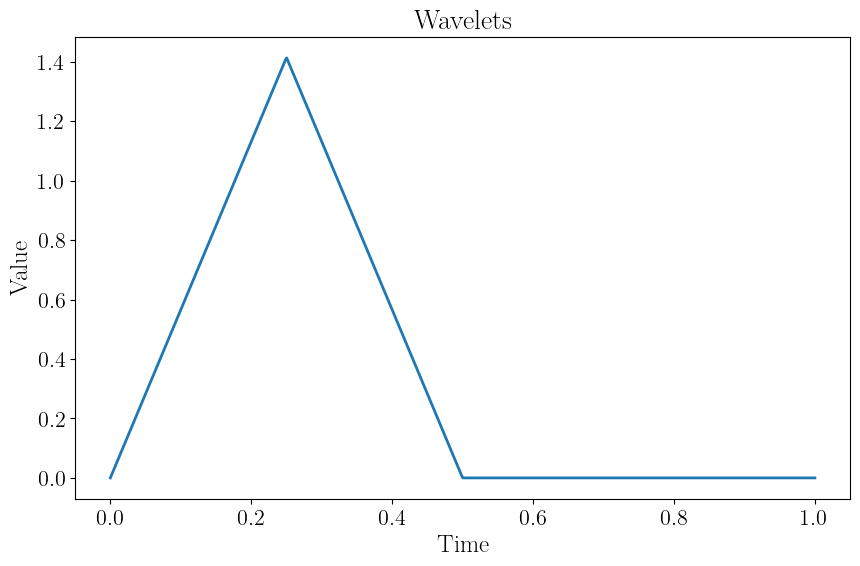

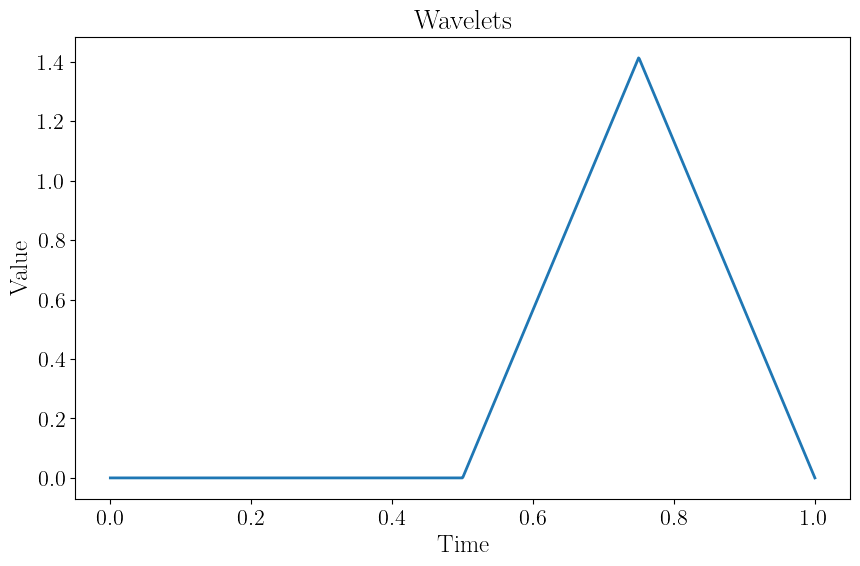

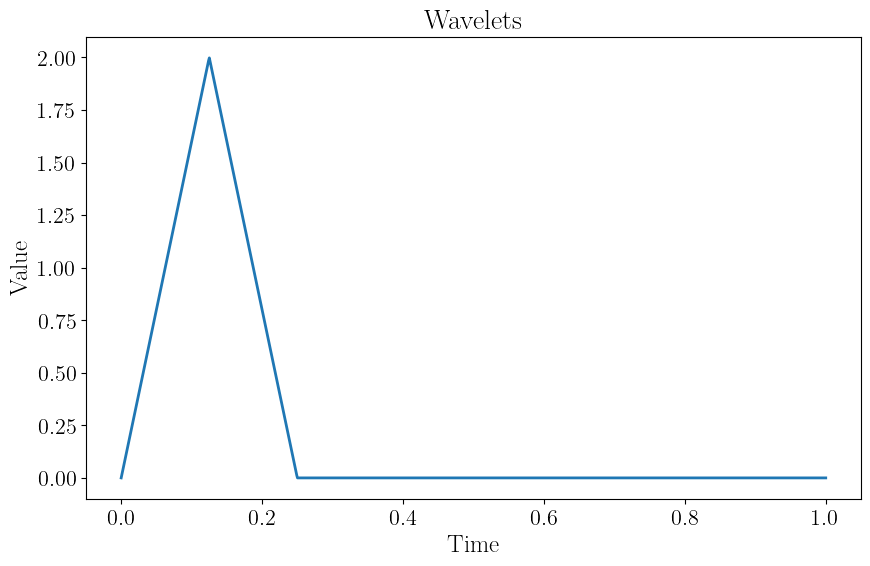

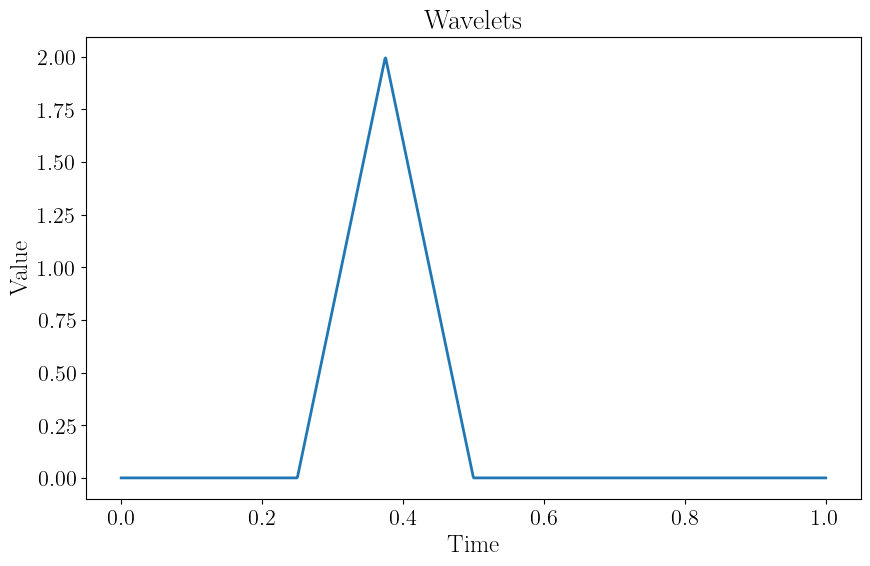

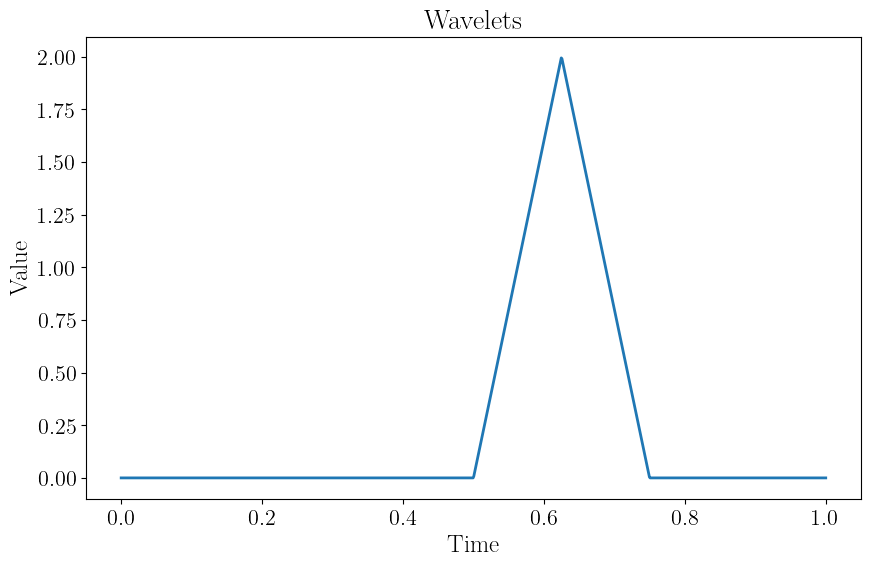

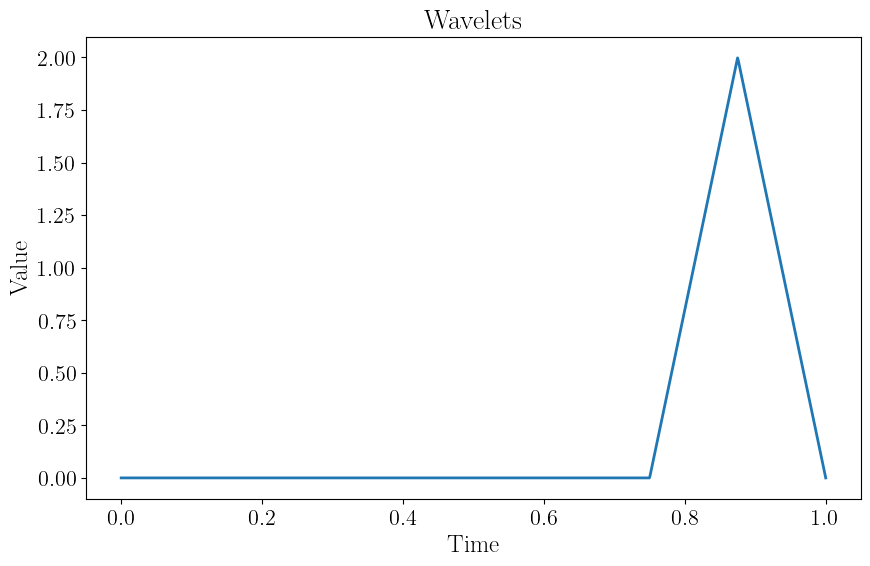

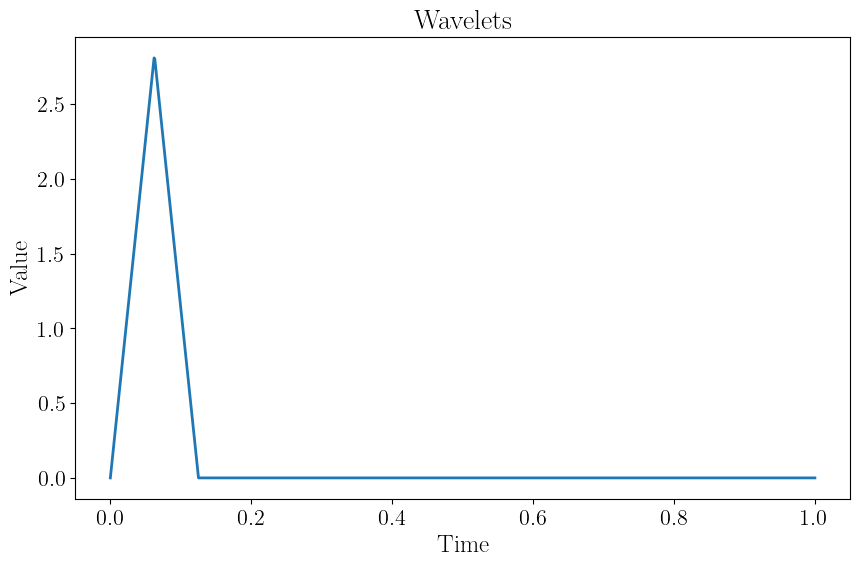

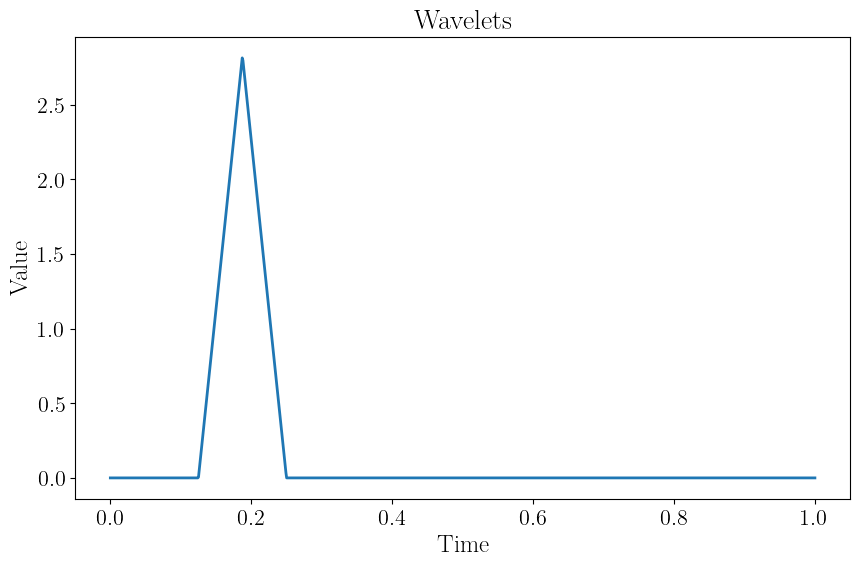

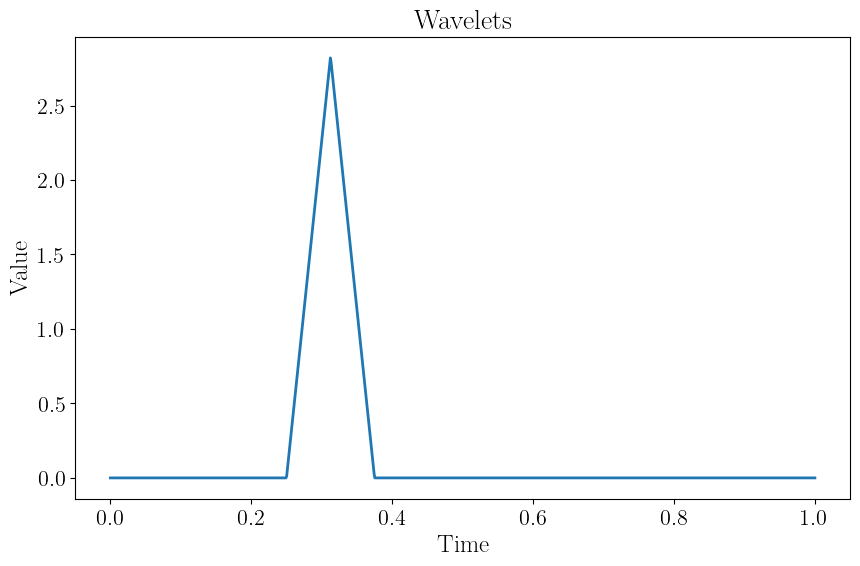

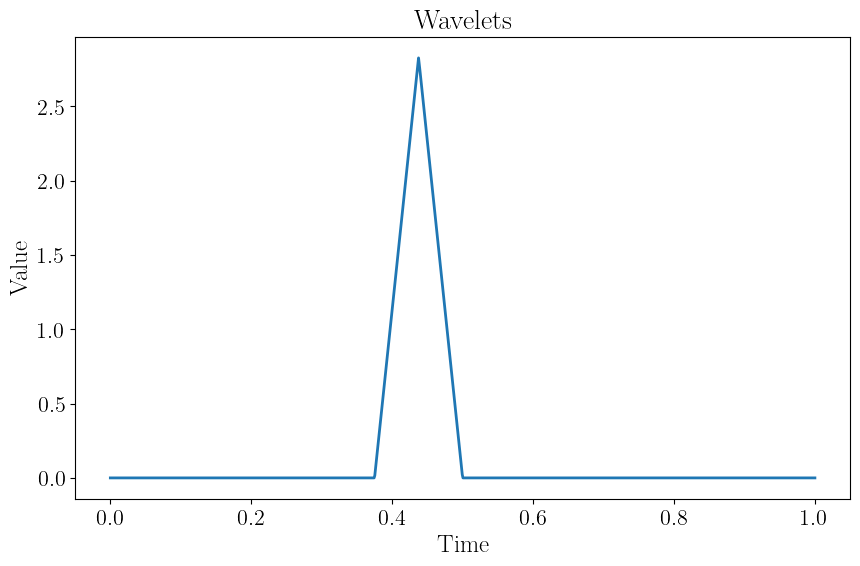

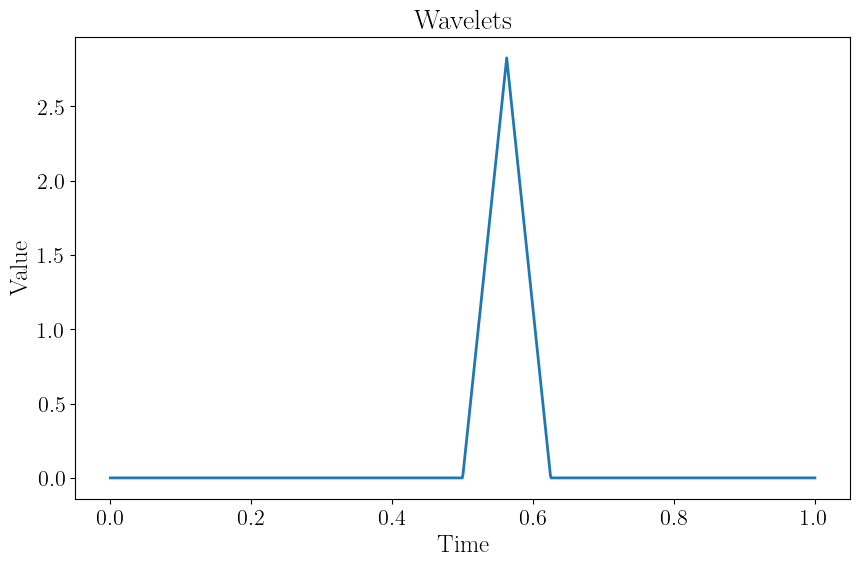

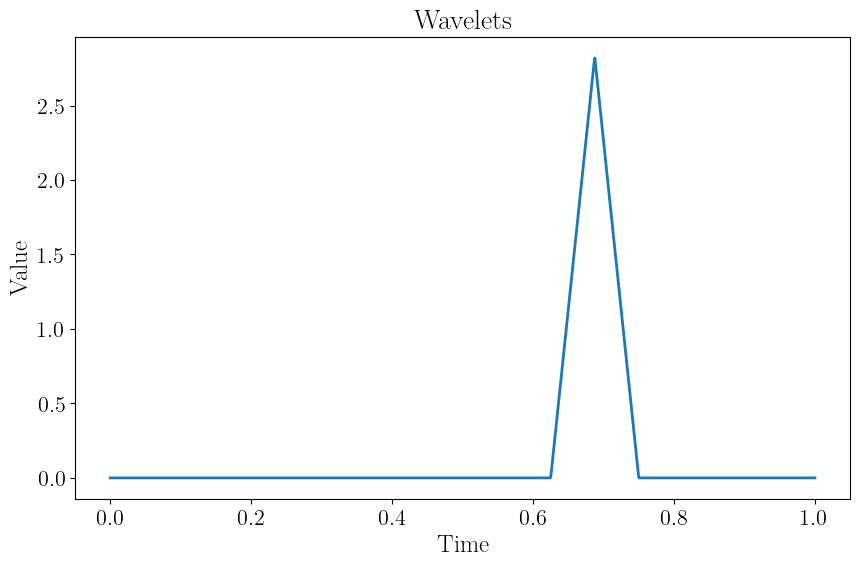

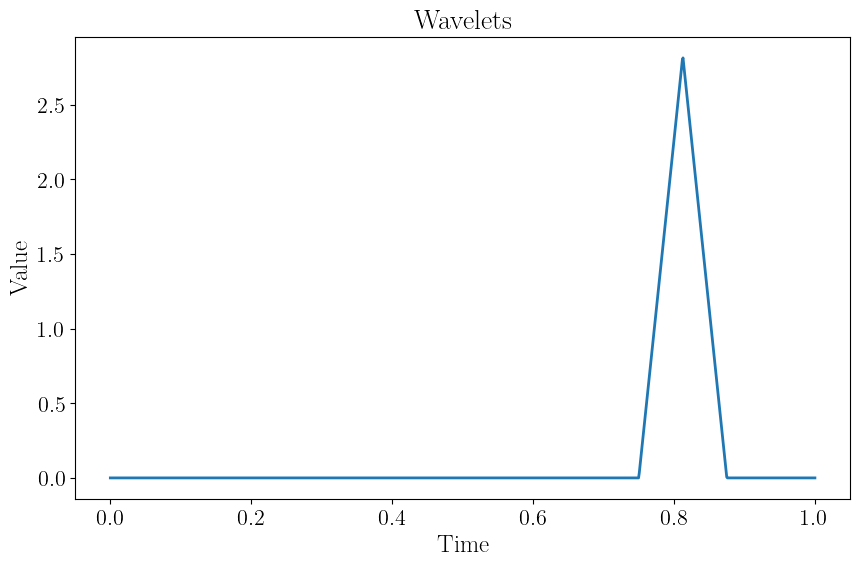

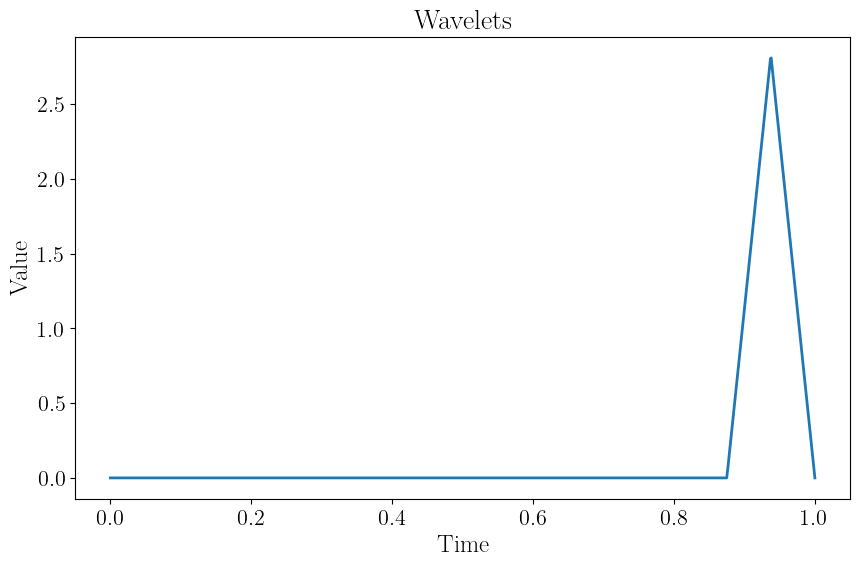

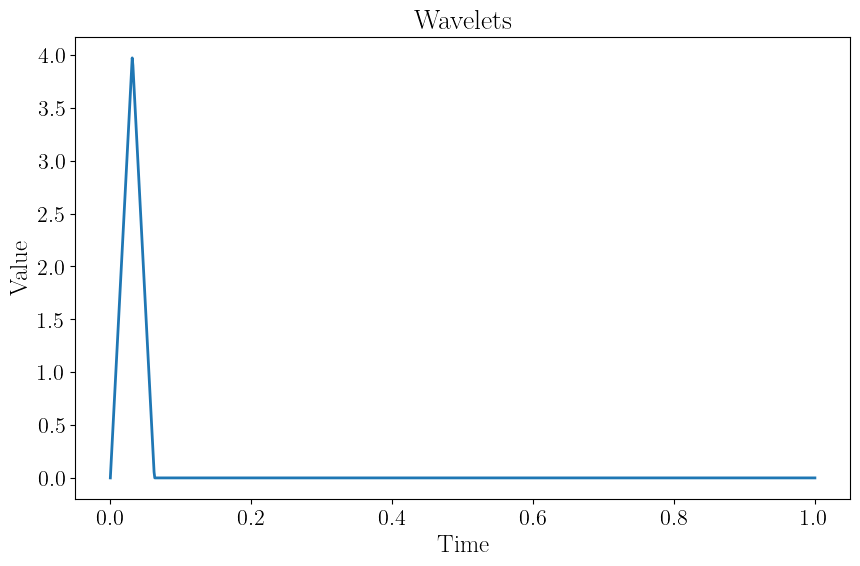

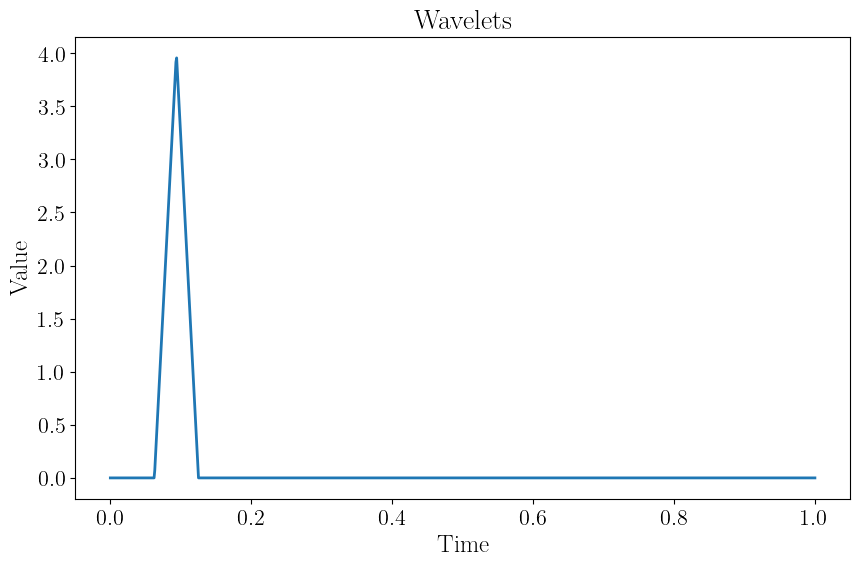

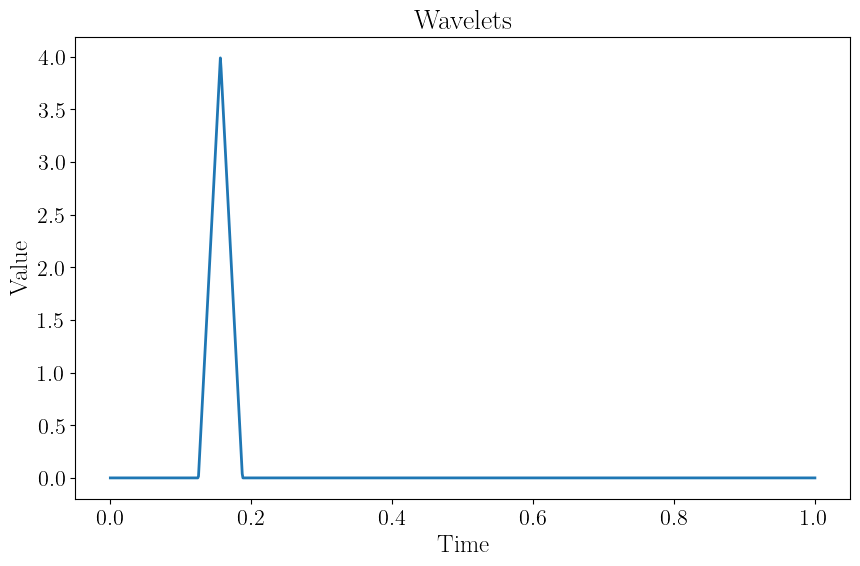

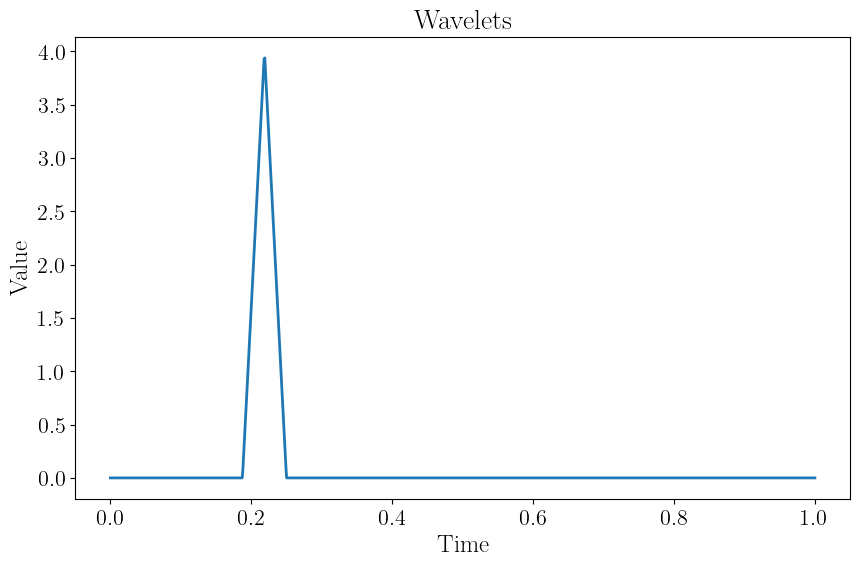

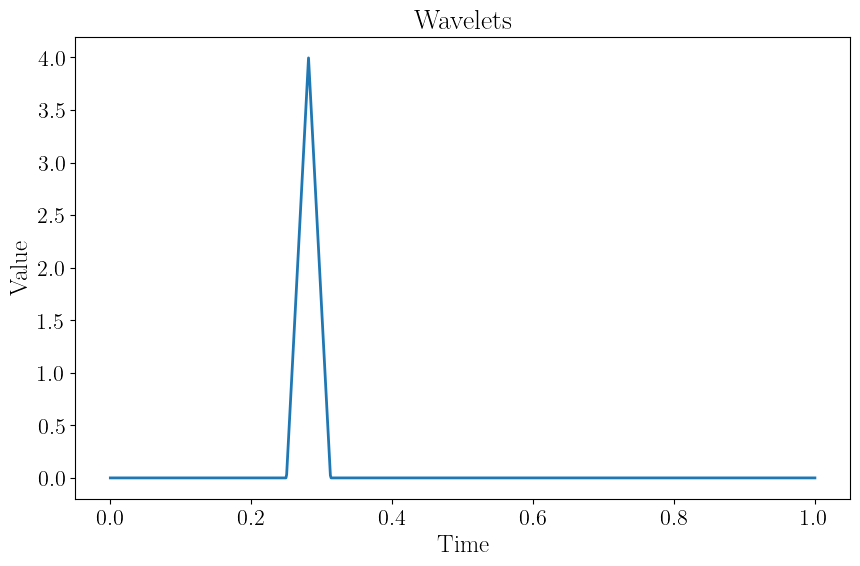

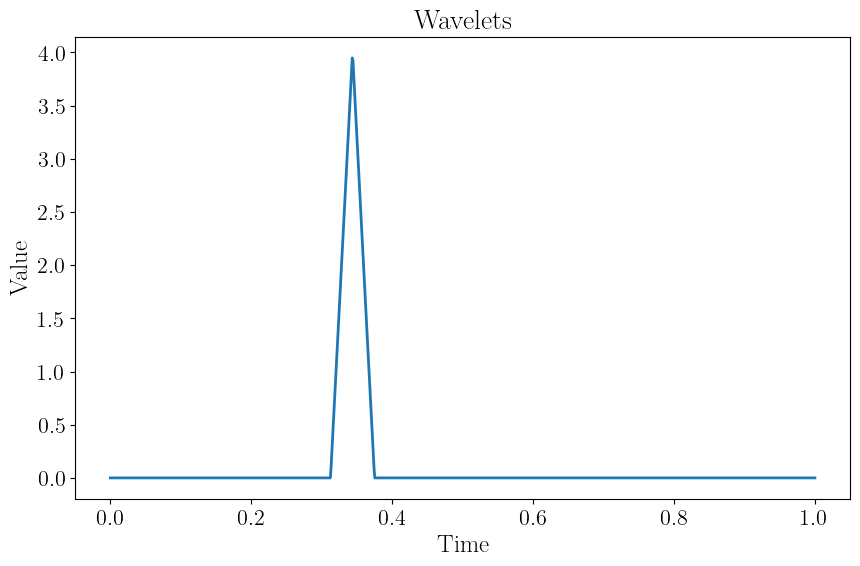

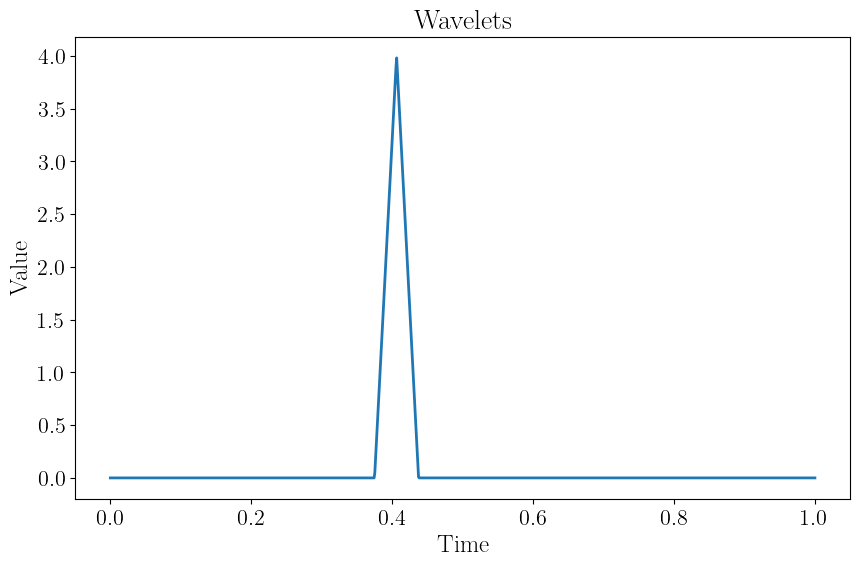

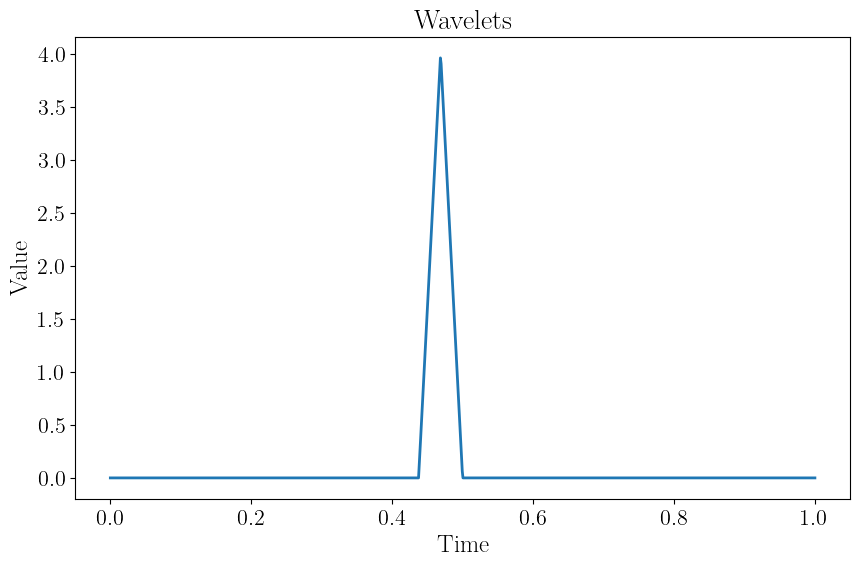

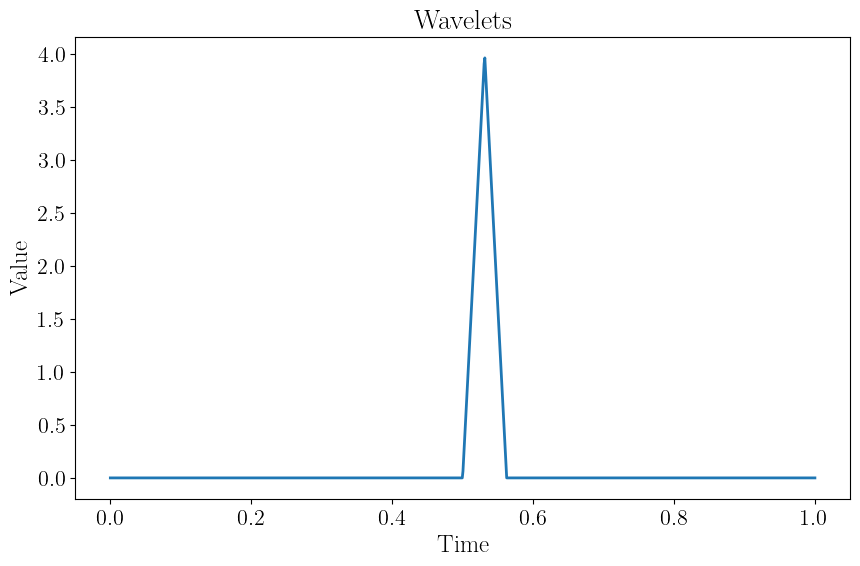

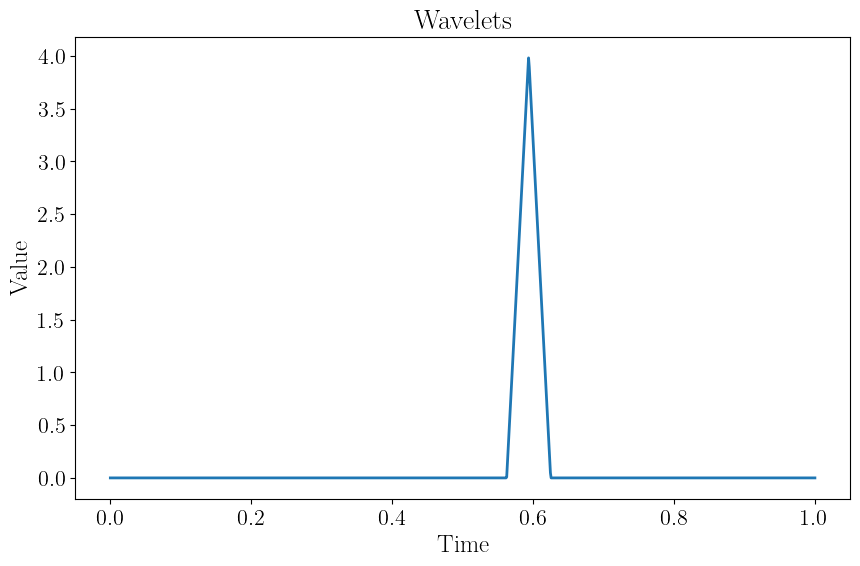

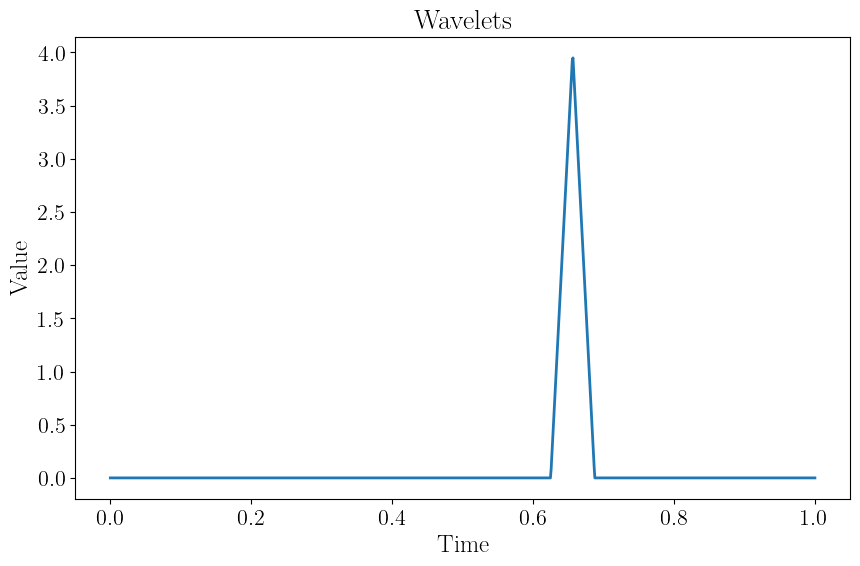

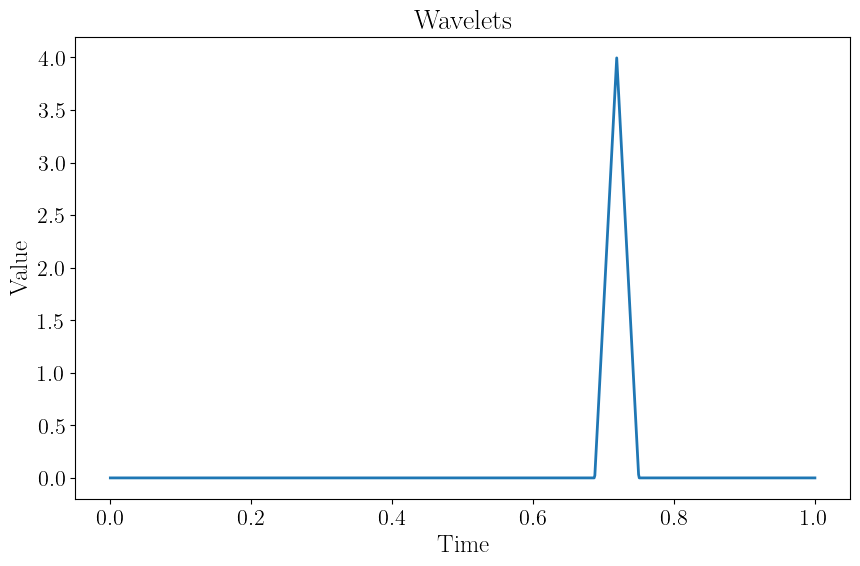

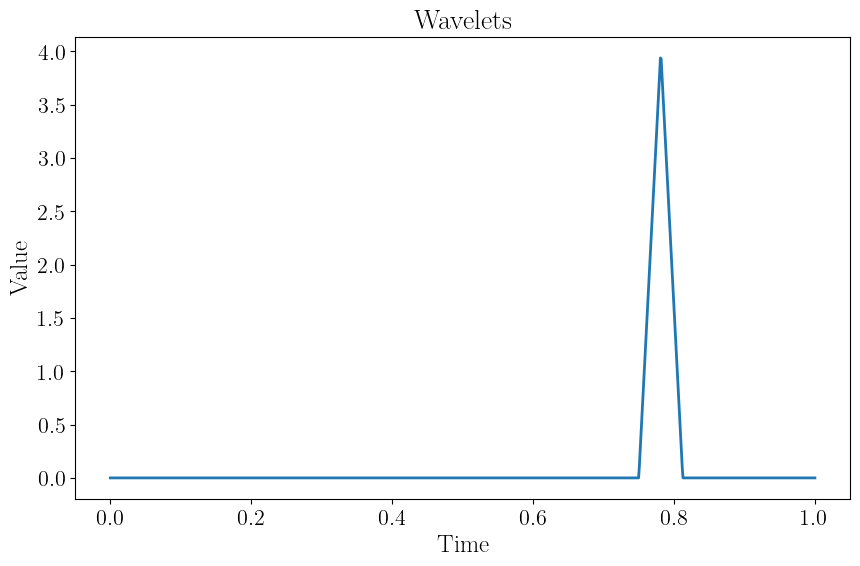

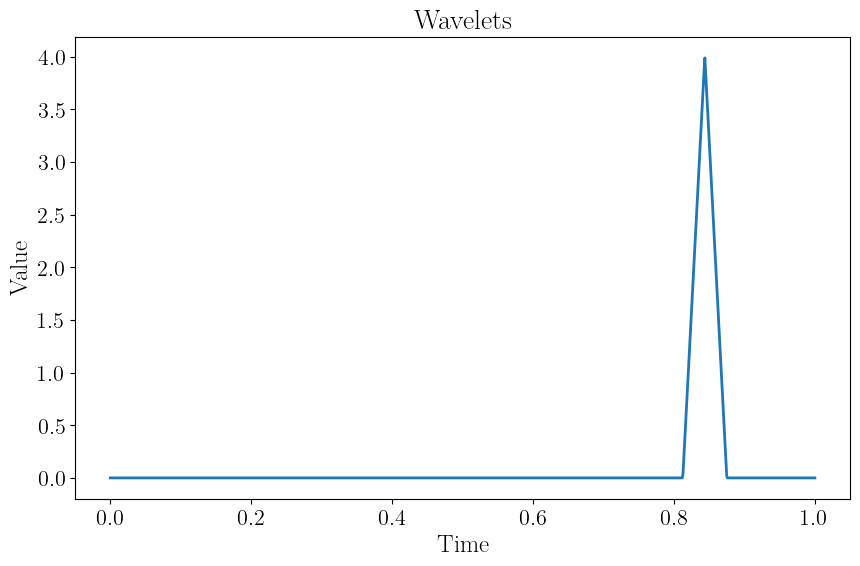

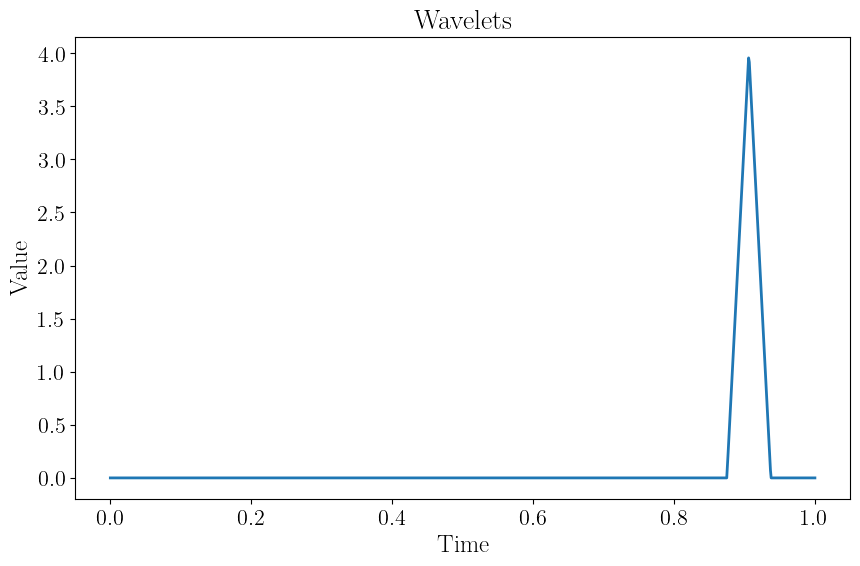

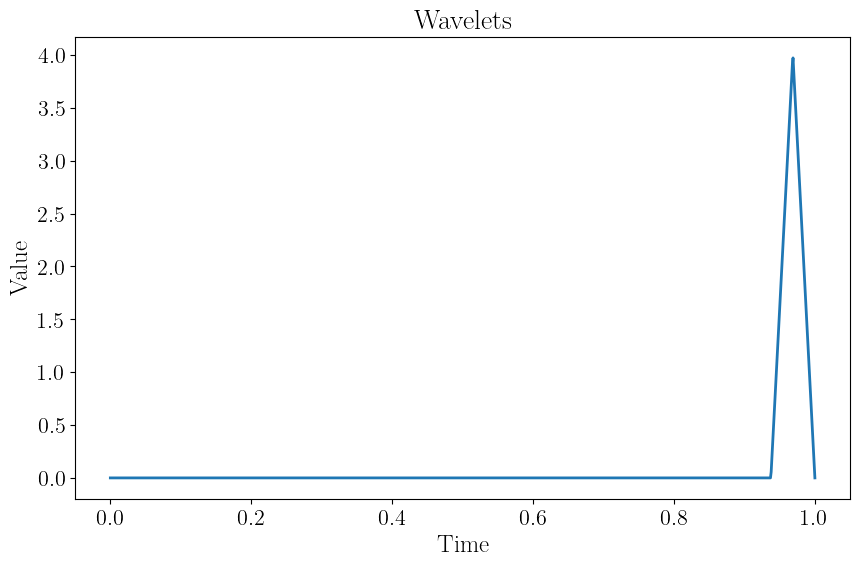

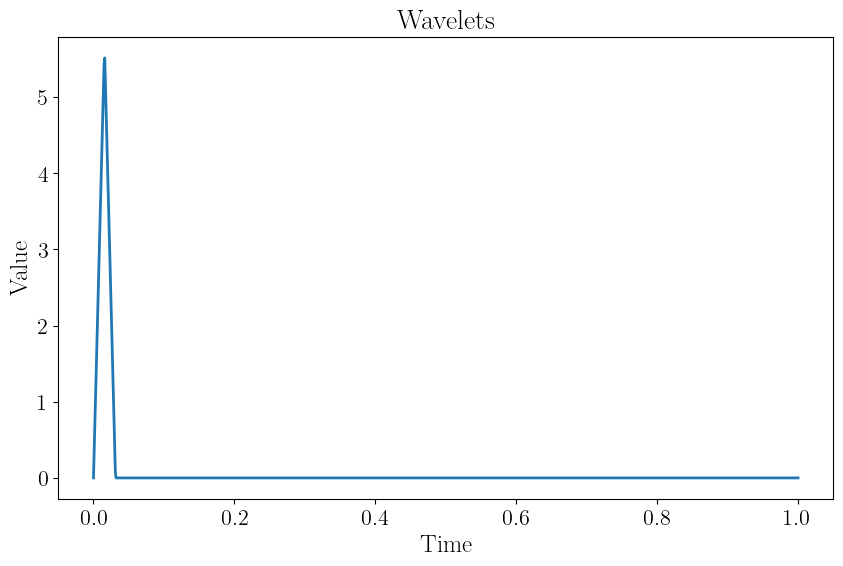

In [126]:
# 6.3 (b)

def mother(t):
    if 0 <= t < 0.5:
        return 2*t
    if 0.5 < t <= 1:
        return 2*(1 -t)
    return 0

def daughter(n, t):
    j = math.floor(math.log(n, 2))
    k = n - 2**j
    new_t = (2**j)*t - k
    x = 2**(j/2)
    return (x * mother(new_t))

def wavelets(n):
    x = 1000
    time = np.linspace (0, 1, x)
    daughters = [daughter(n, time[t]) for t in range(x)]
    plt.plot(time, daughters)
    plt.title('Wavelets')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()

for x in range(1, 33):
    wavelets(x)
